# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [1]:
# Resolver acá
import sys
!pip install wbdata


In [2]:
import wbdata
import pandas as pd
#Importamos todo lo necesario para realizar la extracción de datos

In [3]:

#Realizamos la carga de datos. Primero Argentina, segundo Brasil

indicadores = {'NY.GDP.MKTP.CD':'GDP (current US$)',
               'NY.GDP.PCAP.CD':'GDP per capita (current US$)'}

data = wbdata.get_dataframe(indicadores, country=['ARG','BRA'])

#Renombramos la columna "country" por la de "país"
data = data.reset_index() 
data["País"] = data["country"]

data = data.drop(columns=["country"])



In [5]:


#Pivoteamos el DataFrame para tener los valores en columnas separadas por país
df = data.pivot(index="date", columns="País", values=list(indicadores.values()))

df = data.sort_index(ascending=True)  #<---Aquí corregimos un error presente en las versiones anteriores (donde dice "data", estaba mal escrito "data_f"



In [6]:
#Probamos imprimiendo las primeras filas del dataframe
print(df.head())

   date  GDP (current US$)  GDP per capita (current US$)       País
0  2023       6.460753e+11                  14187.482725  Argentina
1  2022       6.327901e+11                  13935.681111  Argentina
2  2021       4.865641e+11                  10738.017922  Argentina
3  2020       3.857405e+11                   8535.599380  Argentina
4  2019       4.477547e+11                   9955.974787  Argentina


In [7]:
#Visualizamos correctament todo el dataframe
df

,date,GDP (current US$),GDP per capita (current US$),País
0,2023,6.460753e+11,14187.482725,Argentina
1,2022,6.327901e+11,13935.681111,Argentina
2,2021,4.865641e+11,10738.017922,Argentina
3,2020,3.857405e+11,8535.599380,Argentina
4,2019,4.477547e+11,9955.974787,Argentina
...,...,...,...,...
123,1964,2.096373e+10,257.259727,Brazil
124,1963,2.328771e+10,294.169619,Brazil
125,1962,1.923175e+10,250.200573,Brazil
126,1961,1.727594e+10,231.564063,Brazil


In [8]:
df.head(20) #Filtramos la visualización solamente a los últimos 20 años

,date,GDP (current US$),GDP per capita (current US$),País
0,2023,6.460753e+11,14187.482725,Argentina
1,2022,6.327901e+11,13935.681111,Argentina
2,2021,4.865641e+11,10738.017922,Argentina
3,2020,3.857405e+11,8535.599380,Argentina
4,2019,4.477547e+11,9955.974787,Argentina
5,2018,5.248199e+11,11752.799892,Argentina
6,2017,6.436284e+11,14532.500931,Argentina
7,2016,5.575323e+11,12699.962314,Argentina
8,2015,5.947493e+11,13679.626498,Argentina
9,2014,5.263197e+11,12233.144412,Argentina


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [15]:
from datetime import datetime

In [18]:
# Definimos los indicadores de interés
indicadores = {
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'NY.GDP.PCAP.CD': 'GDP per capita (current US$)'
}

data = wbdata.get_dataframe(indicadores, country=['ARG', 'BRA'])

#Convertimos el índice de fecha en tipo datetime para filtrado
data = data.reset_index()
data['date'] = pd.to_datetime(data['date'])

#Igual que en el punto anterior, buscamos los últimos 20 años para simplificar
anio_actual = datetime.now().year
df_ultimos_20 = data[data['date'].dt.year >= (anio_actual - 20)]

#Volvemos a ordenar los datos de forma descendente por fecha
df_ultimos_20 = df_ultimos_20.sort_values(by='date', ascending=False)

#Estadísticas descriptivas por país y variable (MEDIA, MEDIANA, MINIMOS Y MÁXIMOS DE CADA VARIABLE)
estadisticas = df_ultimos_20.groupby('country')[list(indicadores.values())].agg(['mean', 'median', 'min', 'max'])

# Imprimimos los resultados
estadisticas = estadisticas.T  

In [20]:
estadisticas

country                                 Argentina        Brazil
GDP (current US$)            mean    4.690067e+11  1.879068e+12
                             median  5.248199e+11  1.873288e+12
                             min     1.987371e+11  8.916338e+11
                             max     6.460753e+11  2.616156e+12
GDP per capita (current US$) mean    1.086028e+04  9.401081e+03
                             median  1.175280e+04  9.029833e+03
                             min     5.067653e+03  4.827782e+03
                             max     1.453250e+04  1.339662e+04

#### Ejercicio 3 - Practicando con Matplotlib

Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo pyplot y otro gráfico de estilo orientada a objetos


In [23]:
# Resolver acá estilo pyplot
import matplotlib.pyplot as plt


In [24]:
#Repetimos el código anterior
indicadores = {
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'NY.GDP.PCAP.CD': 'GDP per capita (current US$)'
}

data = wbdata.get_dataframe(indicadores, country=['ARG', 'BRA'])

#Convertimos el índice de fecha en tipo datetime para filtrado
data = data.reset_index()
data['date'] = pd.to_datetime(data['date'])

#Igual que en el punto anterior, buscamos los últimos 20 años para simplificar
anio_actual = datetime.now().year
df_ultimos_20 = data[data['date'].dt.year >= (anio_actual - 20)]

#Volvemos a ordenar los datos de forma descendente por fecha
df_ultimos_20 = df_ultimos_20.sort_values(by='date', ascending=False)

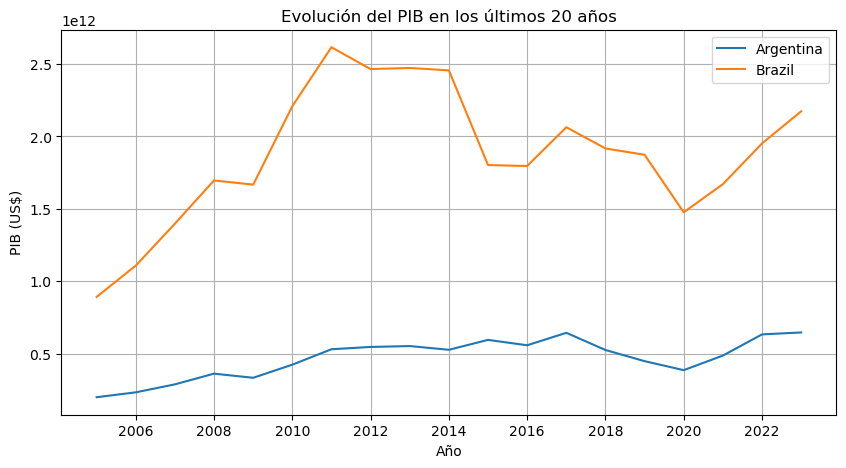

In [25]:
# Graficamos estilo Pyplot [ Evolución del PIB. Vemos el claro estancamiento argentino :( ]
plt.figure(figsize=(10, 5))
for country in df_ultimos_20['country'].unique():
    subset = df_ultimos_20[df_ultimos_20['country'] == country]
    plt.plot(subset['date'], subset['GDP (current US$)'], label=country)

plt.xlabel('Año')
plt.ylabel('PIB (US$)')
plt.title('Evolución del PIB en los últimos 20 años')
plt.legend()
plt.grid()
plt.show()

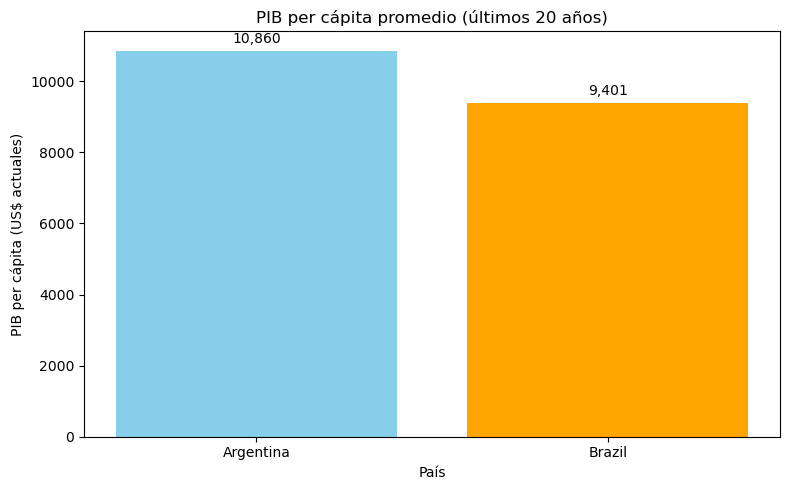

In [26]:
promedios = df_ultimos_20.groupby('country')['GDP per capita (current US$)'].mean()

# Gráfico estilo orientado a objetos
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(promedios.index, promedios.values, color=['skyblue', 'orange'])

ax.set_title('PIB per cápita promedio (últimos 20 años)')
ax.set_xlabel('País')
ax.set_ylabel('PIB per cápita (US$ actuales)')

#Mostramos los valores arriba de las barras
for i, v in enumerate(promedios.values):
    ax.text(i, v + max(promedios.values)*0.02, f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [33]:
# Resolver acá
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [35]:
# URL de la portada del diario La Nación
url = "https://www.lanacion.com.ar/"

response = requests.get(url) #Traemos el contenido del html

if response.status_code == 200:
    # Parsear el HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

   
    links = [] #Buscamos todos los links de las noticias
    for link in soup.find_all("a", href=True):  #Buscamos etiquetas <a> con href (links)
        href = link["href"]
        if "/nota/" in href or "/politica/" in href or "/deportes/" in href:  #Filtramos noticias también
            if not href.startswith("https"): 
                href = "https://www.lanacion.com.ar" + href
            links.append(href)


    df = pd.DataFrame({"Links de Noticias": links})    #Creamos un DataFrame con los links obtenidos

    # Guardar los links en un archivo Excel
    df.to_excel("noticias_lanacion.xlsx", index=False)

    print("Archivo 'noticias_lanacion.xlsx' guardado con éxito.")
else:
    print(f"Error al obtener la página: Código {response.status_code}")


Archivo 'noticias_lanacion.xlsx' guardado con éxito.
